<a href="https://colab.research.google.com/github/IlyaS-26/Telecom/blob/main/lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа №9
Сергеев Илья, группа 3530901/90203

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

PI2 = 2 * np.pi
GRAY = '0.7'

import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/archer-man/ThinkDSP/raw/master/code/thinkdsp.py
from thinkdsp import decorate

Упражнение 9.1

Прогнаны примеры из блокнота chap09.ipynb.

Упражнение 9.2

Создадим треугольный сигнал, напечатаем его, применим функцию diff к сигналу и проанализируем результат. Вычислим спектр изначального сигнала, применим differentiate, проанализируем результат. Преобразуем спектр обратно в сигнал, проанализируем результат и различия воздействия diff и differentiate на исходный сигнал.

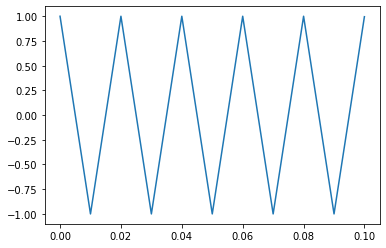

In [2]:
from thinkdsp import TriangleSignal

w = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
w.plot()

Применение функции diff:

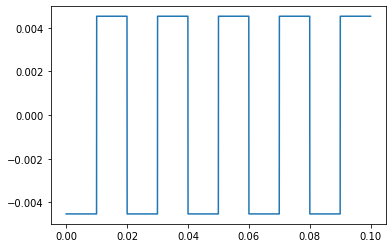

In [3]:
out_w = w.diff()
out_w.plot()

Когда мы берем спектральную производную, мы получаем «звон» вокруг разрывов.

Проблема в том, что производная треугольной волны не определена в точках треугольника.

Применим дифференцирующий фильтр differentiate:

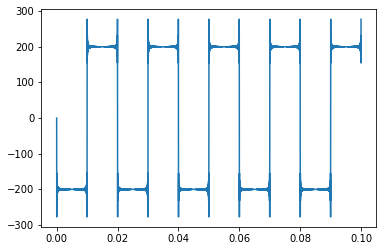

In [4]:
out_w2 = w.make_spectrum().differentiate().make_wave()
out_w2.plot()

Упражнение 9.3

Изучим влияние cumsum и integrate на прямоугольный сигнал. Создадим прямоугольный сигнал, напечатаем его и применим cumsum. Вычислим спектр исходного сигнала, применим integrate. Преобразуем спектр в изначальный сигнал, проанализируем результаты и различия воздействия cumsum и integrate на прямоугольный сигнал.

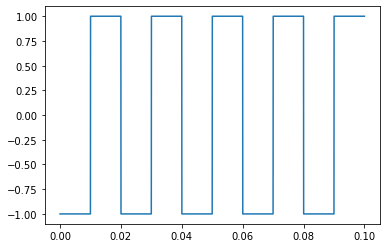

In [5]:
from thinkdsp import SquareSignal

w = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
w.plot()

Совокупная сумма прямоугольной волны представляет собой треугольную волну.

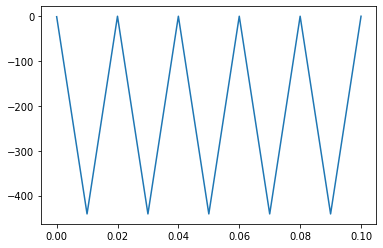

In [6]:
out = w.cumsum()
out.plot()

Спектральный интеграл также представляет собой треугольную волну, хотя амплитуда сильно отличается.

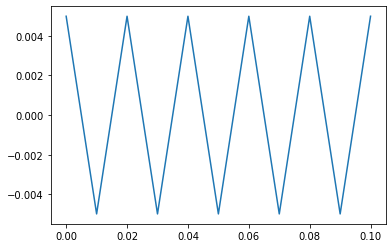

In [7]:
spectrum = w.make_spectrum().integrate()
spectrum.hs[0] = 0
out2 = spectrum.make_wave()
out2.plot()

Если мы снимем смещение и нормализуем две волны, они будут визуально похожи.

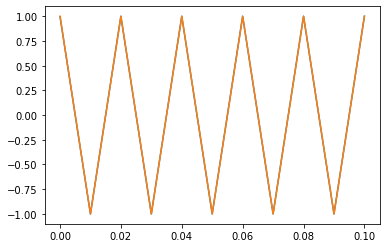

In [8]:
out.unbias()
out.normalize()
out2.normalize()
out.plot()
out2.plot()

Они численно похожи, но с точностью всего около 3 десятков.

In [9]:
out.max_diff(out2)

0.0045351473922902175

Упражнение 9.4

Изучим влияние двойного интегрирования на пилообразный сигнал. Вычислим спектр исходного сигнала, а затем дважды применим integrate.

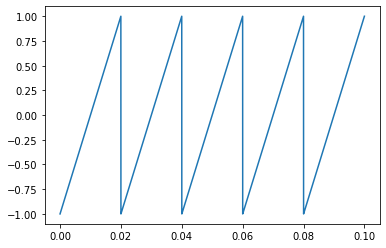

In [10]:
from thinkdsp import SawtoothSignal

w = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
w.plot()

Первая нарастающая сумма — это парабола:

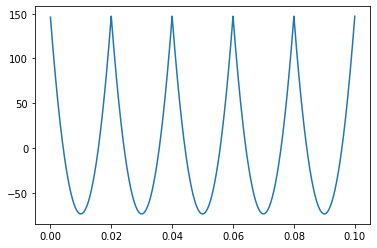

In [11]:
out = w.cumsum()
out.unbias()
out.plot()

Вторая нарастающая сумма — это кубическая кривая:

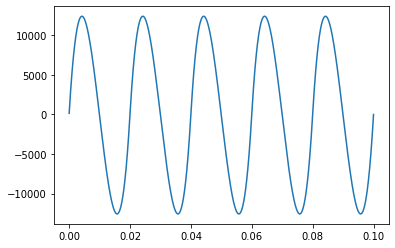

In [12]:
out = out.cumsum()
out.plot()

Дважды интегрируем и получаем также кубическую кривую:

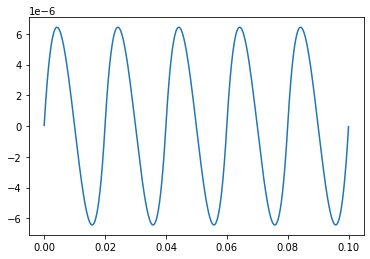

In [13]:
spec = w.make_spectrum().integrate().integrate()
spec.hs[0] = 0
out2 = spec.make_wave()
out2.plot()

Полученный график похож на синусоиду, двойная интеграция действует как фильтр нижних частот.

Упражнение 9.5

Изучим влияние второй разности и второй производной на CubicSignal сигнале, который определен в thinkdsp. Вычислим вторую разность, дважды применив diff. Вычислим вторую производную, дважды применив differentiate к спектру. Проанализируем получившиеся результаты.

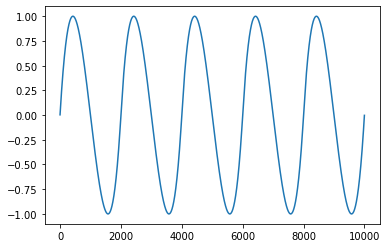

In [14]:
from thinkdsp import CubicSignal

w = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
w.plot()

Первая разность — это парабола, а вторая разность — пилообразный сигнал.

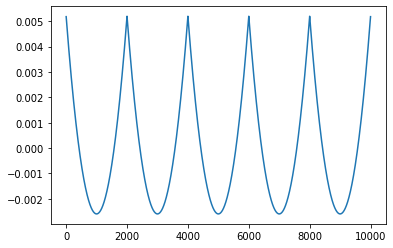

In [15]:
out = w.diff()
out.plot()

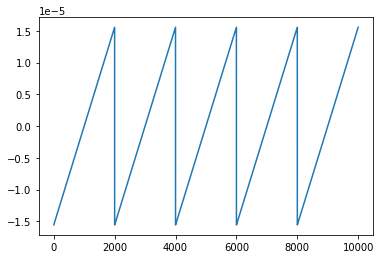

In [16]:
out = out.diff()
out.plot()

Когда мы дифференцируем дважды, мы получаем пилообразную форму с некоторым звоном. Опять же, проблема в том, что производная параболического сигнала не определена в точках.

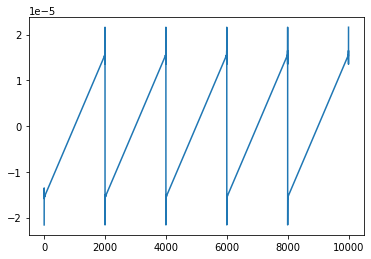

In [17]:
spec = w.make_spectrum().differentiate().differentiate()
out2 = spec.make_wave()
out2.plot()

Окно второй разности это -1, 2, -1. Вычисляя ДПФ, можно найти соответствующий фильтр.

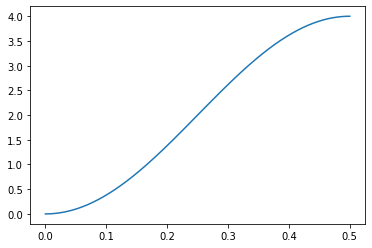

In [18]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(w))
diff_wave = Wave(padded, framerate=w.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot()

Для второй производной можно найти соответствующий фильтр, рассчитав фильтр первой прозводной и возведя его в квадрат.

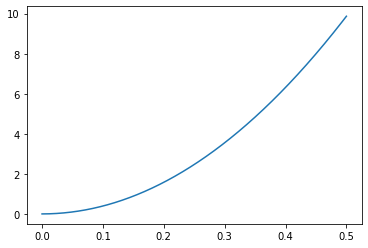

In [19]:
derived_filter = w.make_spectrum()
derived_filter.hs = (PI2 * 1j * derived_filter.fs)**2
derived_filter.plot()

Оба являются фильтрами верхних частот, которые усиливают высокочастотные компоненты. Вторая производная является параболической, поэтому она больше всего усиливает самые высокие частоты. 2-я разность является хорошей аппроксимацией 2-й производной только на самых низких частотах, далее она существенно отклоняется.